# Computing the optimal statistic with enterprise

In this notebook you will learn how to compute the optimal statistic. The optimal statistic is a frequentist detection statistic for the stochastic background. It assesses the significance of the cross-correlations, and compares them to the Hellings-Downs curve.

For more information, see Anholm et al. 2009, Demorest et al. 2013, Chamberlin et al. 2015, Vigeland et al. 2018.

In [21]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import numpy as np
import pickle
import json

import matplotlib.pyplot as plt
%matplotlib inline

from enterprise.signals import signal_base
from enterprise.signals import gp_signals

from enterprise_extensions import model_utils, blocks
from enterprise_extensions.frequentist import optimal_statistic as opt_stat

In [3]:
# Load up the pulsars from the pickle file

picklefile = '/Users/vigeland/Documents/Research/NANOGrav/nanograv_data/12p5yr/channelized_v3_DE438_45psrs.pkl'
with open(picklefile, 'rb') as f:
    psrs = pickle.load(f)
len(psrs)

45

In [4]:
# Load up the noise dictionary to get values for the white noise parameters

noisefile = '/Users/vigeland/Documents/Research/NANOGrav/nanograv_data/12p5yr/channelized_12p5yr_v3_full_noisedict.json'

with open(noisefile, 'r') as f:
    noisedict = json.load(f)

In [22]:
# Initialize the optimal statistic object
# You can give it a list of pulsars and the noise dictionary, and it will create the pta object for you
# Alternatively, you can make the pta object yourself and give it to the OptimalStatistic object as an argument

# find the maximum time span to set GW frequency sampling
Tspan = model_utils.get_tspan(psrs)

s = gp.signals.TimingModel()
s += blocks.white_noise_block(vary=False, inc_ecorr=True, select='backend')
s += blocks.red_noise_block(prior='log-uniform', Tspan=Tspan, components=30)
s += blocks.common_red_noise_block(psd='powerlaw', prior='log-uniform', Tspan=Tspan, 
                                   components=5, gamma_val=4.33, name='gw')

# set up PTA object
pta = signal_base.PTA([s(p) for p in psrs])

# set white noise parameters to the values in the noise dictionary
pta.set_default_params(noisedict)

os = opt_stat.OptimalStatistic(psrs, noisedict=noisedict, pta=pta)

INFO: enterprise.signals.signal_base: Setting B1855+09_430_ASP_efac to 1.149036589204419
INFO: enterprise.signals.signal_base: Setting B1855+09_430_PUPPI_efac to 1.0543836580555548
INFO: enterprise.signals.signal_base: Setting B1855+09_L-wide_ASP_efac to 1.080749375878354
INFO: enterprise.signals.signal_base: Setting B1855+09_L-wide_PUPPI_efac to 1.2429537099744354
INFO: enterprise.signals.signal_base: Setting B1855+09_430_ASP_log10_equad to -7.379759355541006
INFO: enterprise.signals.signal_base: Setting B1855+09_430_PUPPI_log10_equad to -6.348065001180634
INFO: enterprise.signals.signal_base: Setting B1855+09_L-wide_ASP_log10_equad to -6.51289896375955
INFO: enterprise.signals.signal_base: Setting B1855+09_L-wide_PUPPI_log10_equad to -7.821737281350602
INFO: enterprise.signals.signal_base: Setting B1855+09_430_ASP_log10_ecorr to -7.415374510054153
INFO: enterprise.signals.signal_base: Setting B1855+09_430_PUPPI_log10_ecorr to -5.671108063699219
INFO: enterprise.signals.signal_base: S

INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr_800_GASP_efac to 1.0914149510171187
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr_800_GUPPI_efac to 1.1066698572535434
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr1_2_GASP_log10_equad to -7.5596546617250215
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr1_2_GUPPI_log10_equad to -7.616764039524012
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr_800_GASP_log10_equad to -7.6069868785882795
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr_800_GUPPI_log10_equad to -6.650927606600988
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr1_2_GASP_log10_ecorr to -7.518791621441214
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr1_2_GUPPI_log10_ecorr to -6.783106192555926
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr_800_GASP_log10_ecorr to -7.737621417529334
INFO: enterprise.signals.signal_base: Setting J0613-0200_Rcvr_800_G

INFO: enterprise.signals.signal_base: Setting J1455-3330_Rcvr_800_GASP_log10_ecorr to -7.085458304995403
INFO: enterprise.signals.signal_base: Setting J1455-3330_Rcvr_800_GUPPI_log10_ecorr to -6.526567653068877
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr1_2_GASP_efac to 1.134993789980654
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr1_2_GUPPI_efac to 1.0521556985294778
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr_800_GASP_efac to 1.1935927243559799
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr_800_GUPPI_efac to 1.120996265055496
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr1_2_GASP_log10_equad to -6.960586084616913
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr1_2_GUPPI_log10_equad to -7.761043891506745
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr_800_GASP_log10_equad to -7.311693997685966
INFO: enterprise.signals.signal_base: Setting J1600-3053_Rcvr_800_GUPPI_log10_equad t

INFO: enterprise.signals.signal_base: Setting J1738+0333_S-wide_PUPPI_log10_equad to -7.767394128812992
INFO: enterprise.signals.signal_base: Setting J1738+0333_L-wide_ASP_log10_ecorr to -7.060532309258772
INFO: enterprise.signals.signal_base: Setting J1738+0333_L-wide_PUPPI_log10_ecorr to -7.019786250261518
INFO: enterprise.signals.signal_base: Setting J1738+0333_S-wide_ASP_log10_ecorr to -7.381958762803754
INFO: enterprise.signals.signal_base: Setting J1738+0333_S-wide_PUPPI_log10_ecorr to -7.7411812625497936
INFO: enterprise.signals.signal_base: Setting J1741+1351_430_ASP_efac to 0.9244093327309052
INFO: enterprise.signals.signal_base: Setting J1741+1351_430_PUPPI_efac to 1.0039009232670109
INFO: enterprise.signals.signal_base: Setting J1741+1351_L-wide_ASP_efac to 0.9209852519797033
INFO: enterprise.signals.signal_base: Setting J1741+1351_L-wide_PUPPI_efac to 1.0310288270954124
INFO: enterprise.signals.signal_base: Setting J1741+1351_430_ASP_log10_equad to -7.009806457228215
INFO: 

INFO: enterprise.signals.signal_base: Setting J1910+1256_L-wide_ASP_log10_equad to -7.516992859042785
INFO: enterprise.signals.signal_base: Setting J1910+1256_L-wide_PUPPI_log10_equad to -7.585087262800533
INFO: enterprise.signals.signal_base: Setting J1910+1256_S-wide_ASP_log10_equad to -6.218657154174941
INFO: enterprise.signals.signal_base: Setting J1910+1256_S-wide_PUPPI_log10_equad to -7.401958120896809
INFO: enterprise.signals.signal_base: Setting J1910+1256_L-wide_ASP_log10_ecorr to -7.259684055387137
INFO: enterprise.signals.signal_base: Setting J1910+1256_L-wide_PUPPI_log10_ecorr to -7.403550254322336
INFO: enterprise.signals.signal_base: Setting J1910+1256_S-wide_ASP_log10_ecorr to -7.195615972473434
INFO: enterprise.signals.signal_base: Setting J1910+1256_S-wide_PUPPI_log10_ecorr to -6.218612073150832
INFO: enterprise.signals.signal_base: Setting J1911+1347_430_PUPPI_efac to 0.985037691631346
INFO: enterprise.signals.signal_base: Setting J1911+1347_L-wide_PUPPI_efac to 1.031

INFO: enterprise.signals.signal_base: Setting J2033+1734_L-wide_PUPPI_log10_ecorr to -6.971693370311569
INFO: enterprise.signals.signal_base: Setting J2043+1711_430_ASP_efac to 1.3778492919774936
INFO: enterprise.signals.signal_base: Setting J2043+1711_430_PUPPI_efac to 1.0512309919631644
INFO: enterprise.signals.signal_base: Setting J2043+1711_L-wide_ASP_efac to 1.1374179552758532
INFO: enterprise.signals.signal_base: Setting J2043+1711_L-wide_PUPPI_efac to 0.9994555465027908
INFO: enterprise.signals.signal_base: Setting J2043+1711_430_ASP_log10_equad to -7.4422502879843595
INFO: enterprise.signals.signal_base: Setting J2043+1711_430_PUPPI_log10_equad to -6.713932912210494
INFO: enterprise.signals.signal_base: Setting J2043+1711_L-wide_ASP_log10_equad to -7.464474830386383
INFO: enterprise.signals.signal_base: Setting J2043+1711_L-wide_PUPPI_log10_equad to -8.072882690972005
INFO: enterprise.signals.signal_base: Setting J2043+1711_430_ASP_log10_ecorr to -7.239541093300854
INFO: enterp

In [23]:
# Load up the maximum-likelihood values for the pulsars' red noise parameters, and the common red process
# These values come from the results of a Bayesian search (model 2A)

with open('/Users/vigeland/Documents/Research/NANOGrav/from_nemo/nanograv_gwb_12p5/chains/12p5yr_maxlike.json', 'r') as f:
    ml_params = json.load(f)

In [24]:
# Compute the optimal statistic

xi, rho, sig, OS, OS_sig = os.compute_os(params=ml_params)
print(OS, OS_sig, OS/OS_sig)

4.282358835039079e-30 1.5185812458724845e-30 2.819973476347455


In [25]:
# Plot the cross-correlations and compare to the Hellings-Downs curve
# Before plotting, we need to bin the cross-correlations

def weightedavg(rho, sig):
    weights, avg = 0., 0.
    for r,s in zip(rho,sig):
        weights += 1./(s*s)
        avg += r/(s*s)
        
    return avg/weights, np.sqrt(1./weights)

def bin_crosscorr(zeta, xi, rho, sig):
    
    rho_avg, sig_avg = np.zeros(len(zeta)), np.zeros(len(zeta))
    
    for i,z in enumerate(zeta[:-1]):
        myrhos, mysigs = [], []
        for x,r,s in zip(xi,rho,sig):
            if x >= z and x < (z+10.):
                myrhos.append(r)
                mysigs.append(s)
        rho_avg[i], sig_avg[i] = weightedavg(myrhos, mysigs)
        
    return rho_avg, sig_avg

# sort the cross-correlations by xi
idx = np.argsort(xi)

xi_sorted = xi[idx]
rho_sorted = rho[idx]
sig_sorted = sig[idx]

# bin the cross-correlations so that there are the same number of pairs per bin
npairs = 66

xi_mean = []
xi_err = []

rho_avg = []
sig_avg = []

i = 0
while i < len(xi_sorted):
    
    xi_mean.append(np.mean(xi_sorted[i:npairs+i]))
    xi_err.append(np.std(xi_sorted[i:npairs+i]))

    r, s = weightedavg(rho_sorted[i:npairs+i], sig_sorted[i:npairs+i])
    rho_avg.append(r)
    sig_avg.append(s)
    
    i += npairs
    
xi_mean = np.array(xi_mean)
xi_err = np.array(xi_err)

In [26]:
def get_HD_curve(zeta):
    
    coszeta = np.cos(zeta*np.pi/180.)
    xip = (1.-coszeta) / 2.
    HD = 3.*( 1./3. + xip * ( np.log(xip) -1./6.) )
    
    return HD/2

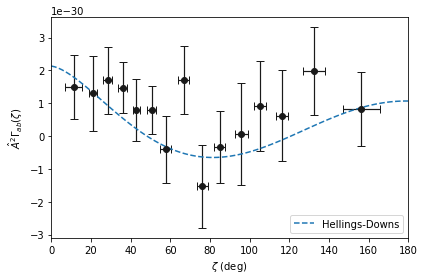

In [27]:
# now make the plot

(_, caps, _) = plt.errorbar(xi_mean*180/np.pi, rho_avg, xerr=xi_err*180/np.pi, yerr=sig_avg, marker='o', ls='', 
                            color='0.1', fmt='o', capsize=4, elinewidth=1.2)

zeta = np.linspace(0.01,180,100)
HD = get_HD_curve(zeta+1)

plt.plot(zeta, OS*HD, ls='--', label='Hellings-Downs', color='C0', lw=1.5)

plt.xlim(0, 180);
#plt.ylim(-4e-30, 5e-30);
plt.ylabel(r'$\hat{A}^2 \Gamma_{ab}(\zeta)$')
plt.xlabel(r'$\zeta$ (deg)');

plt.legend(loc=4);

plt.tight_layout();
plt.show();

To compute the noise-marginalized optimal statistic (Vigeland et al. 2018), you will need the chain from a Bayesian search for a common red process without spatial correlations (model 2A).

In [ ]:
chaindir = ''
params = list(np.loadtxt(chaindir + '/params.txt', dtype='str'))
chain = np.loadtxt(chaindir + '/chain_1.txt')

In [ ]:
N = 1000   # number of times to compute the optimal statistic
burn = int(0.25*chain.shape[0])   # estimate of when the chain has burned in

noisemarg_OS, noisemarg_OS_err = np.zeros(N), np.zeros(N)

for i in range(N):
    
    # choose a set of noise values from the chain
    idx = np.random.randint(burn, chain.shape[0])
    
    # construct a dictionary with these parameter values
    param_dict = {}
    for p in params:
        param_dict.update({p: chain[idx, params.index(p)]})
    
    # compute the optimal statistic at this set of noise values and save in an array
    _, _, _, noisemarg_OS[i], noisemarg_OS_err[i] = os.compute_os(params=param_dict)

In [ ]:
plt.hist(noisemarg_OS)

plt.figure();
plt.hist(noisemarg_OS/noisemarg_OS_err)